In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


df.describe()

from this i conformed that no null values present, and all are in float and int64

In [4]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

i found that "free sulfur dioxide", "total sulfur dioxide","residual sugar","chlorides", "sulphates" columns showing the skewness

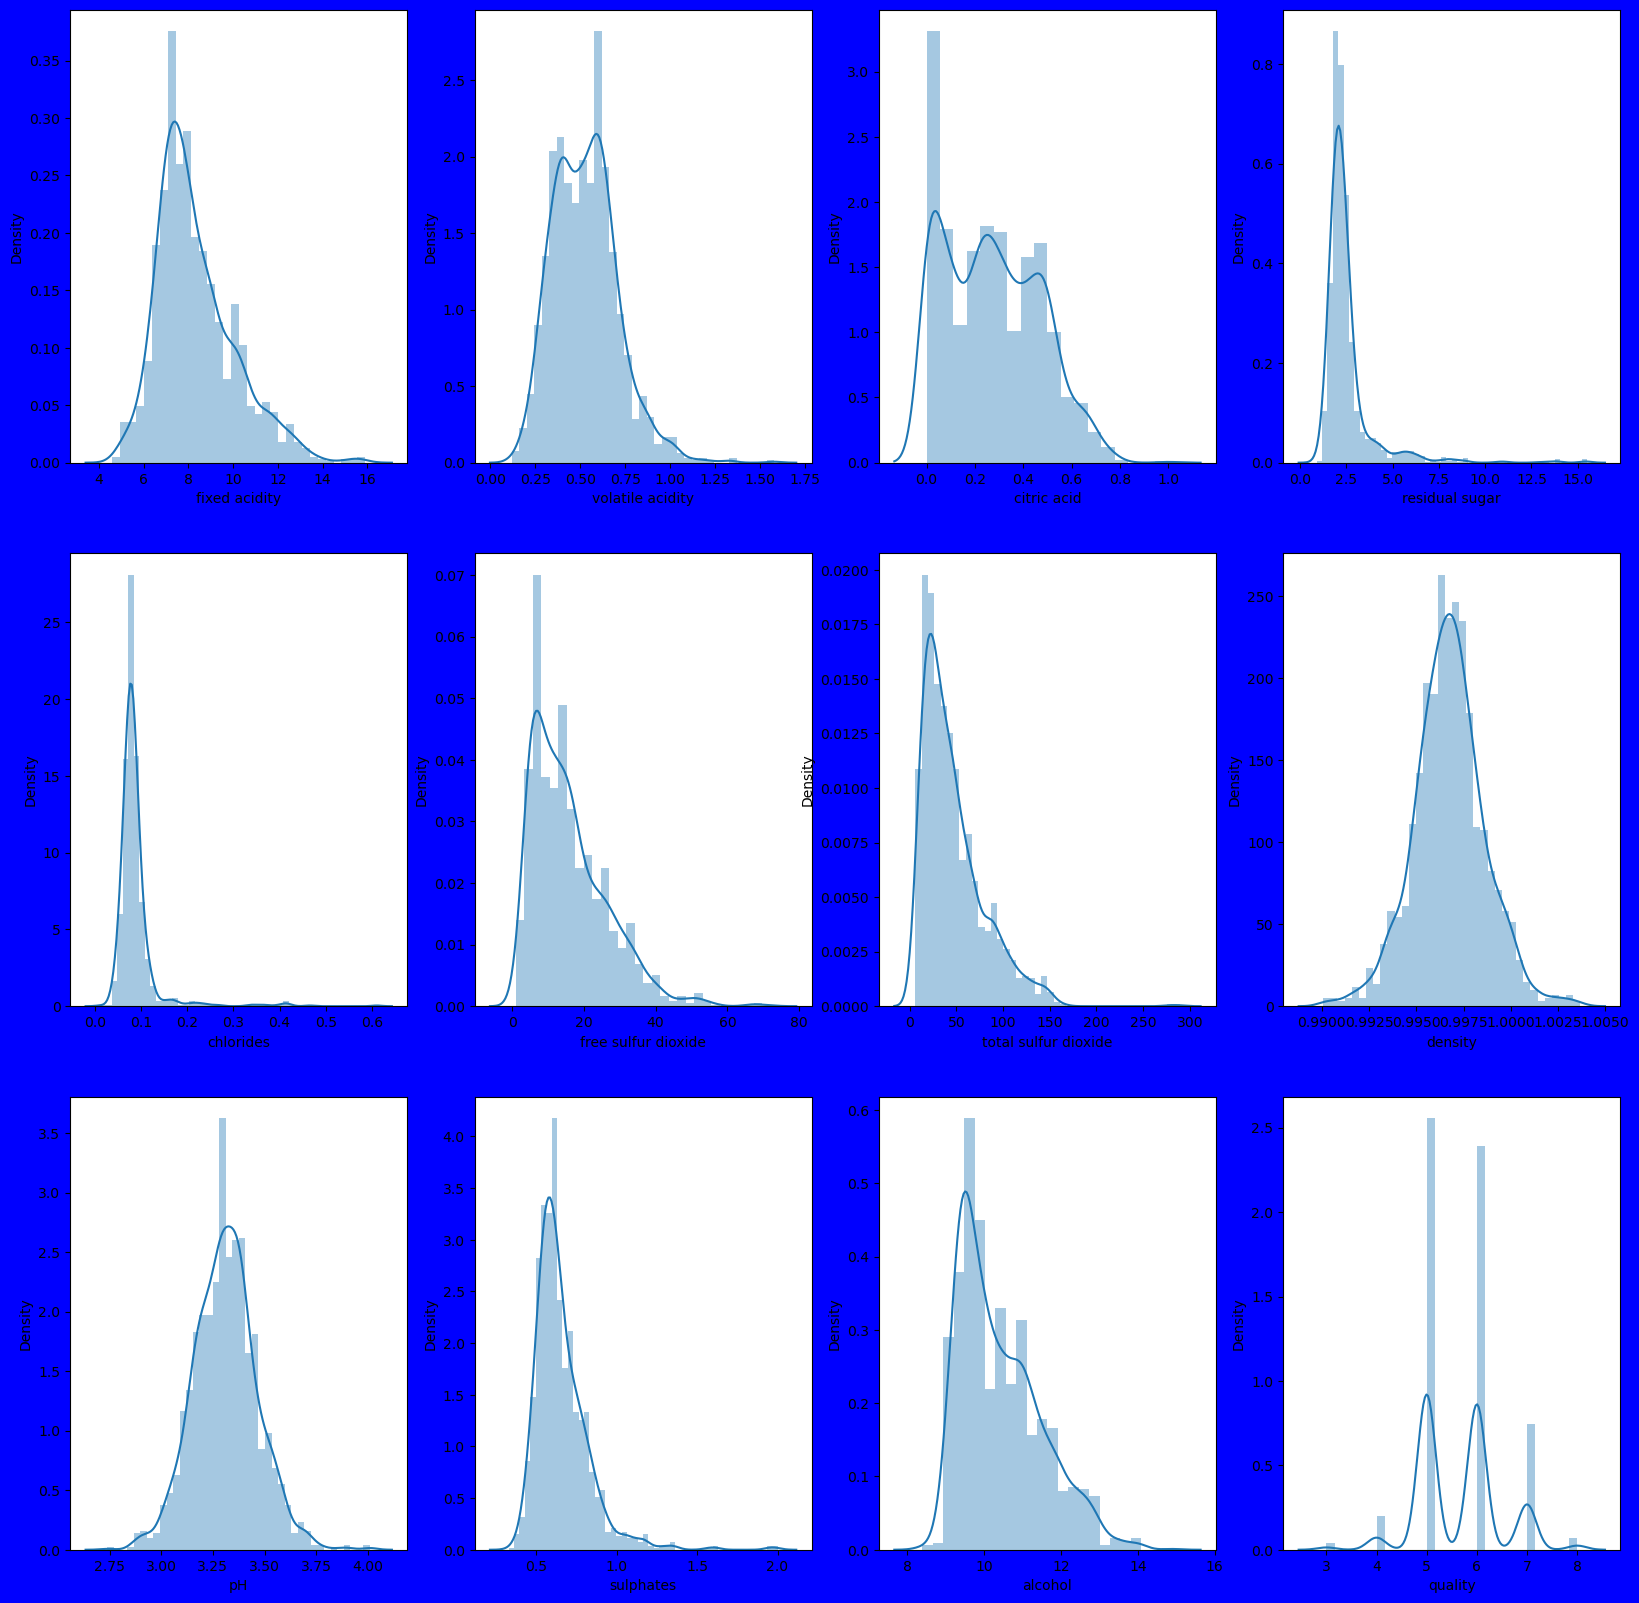

In [5]:
#visualizing the skewness 
plt.figure(figsize =(20,20), facecolor = "blue")
pn = 1
for i in df:
    if pn <=12:
        ax= plt.subplot(3,4, pn)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize= 10)
        pn +=1
plt.show()

 to reduce the skewness i apply sqrt method  >>>>>>>>

In [7]:
list = ["free sulfur dioxide", "total sulfur dioxide","residual sugar","chlorides",  "sulphates"]
for i in list:
    df[i] = np.sqrt(df[i])

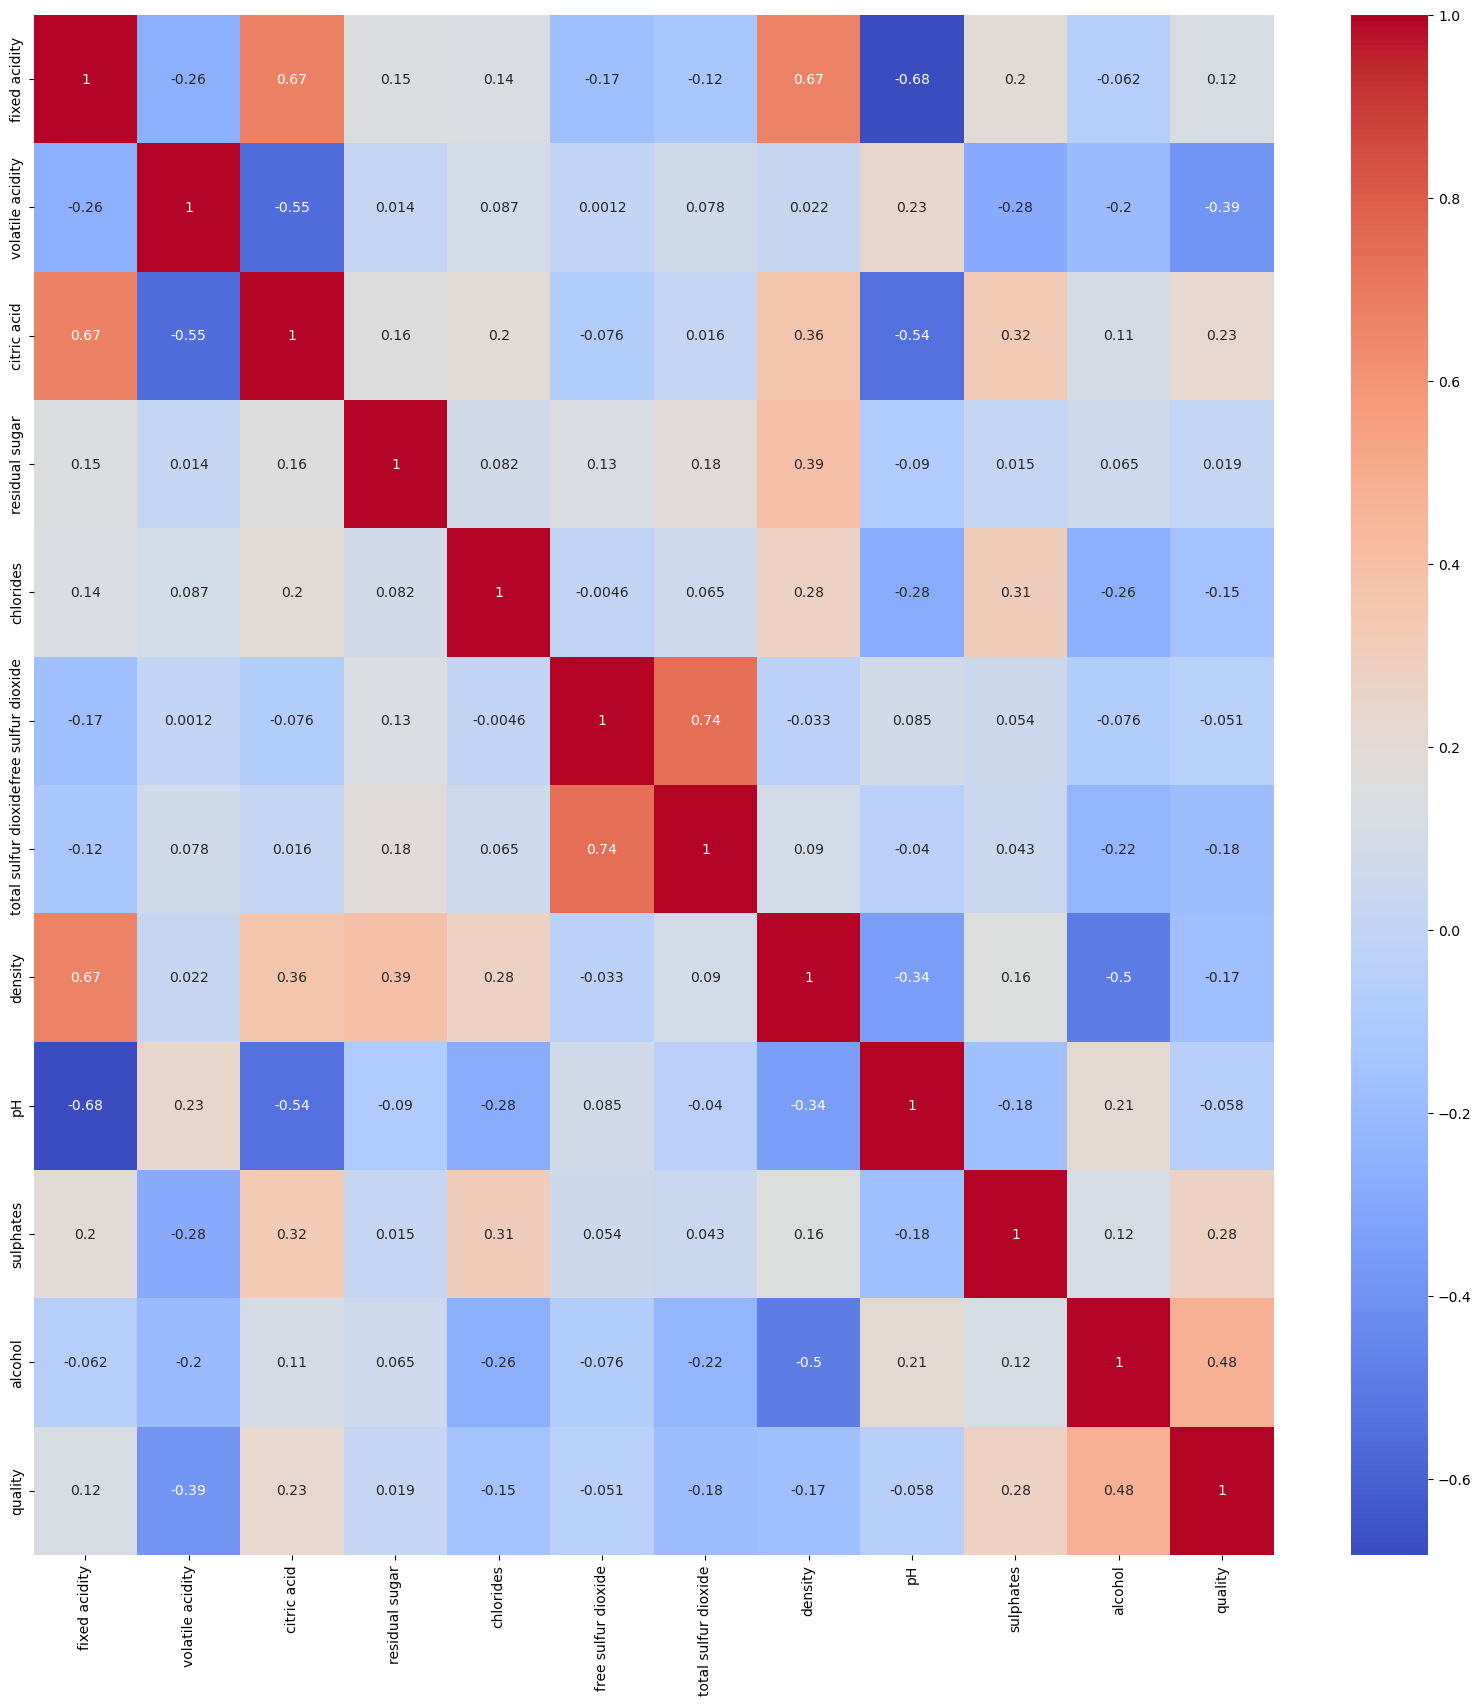

In [8]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.146925,0.135381,-0.170652,-0.118819,0.668047,-0.682978,0.195760,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.014166,0.086502,0.001242,0.077561,0.022026,0.234937,-0.283734,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.160711,0.196887,-0.076024,0.015832,0.364947,-0.541904,0.324914,0.109903,0.226373
residual sugar,0.146925,0.014166,0.160711,1.000000,0.082385,0.134919,0.180544,0.391027,-0.090253,0.014517,0.064991,0.019048
chlorides,0.135381,0.086502,0.196887,0.082385,1.000000,-0.004570,0.064694,0.277195,-0.279972,0.309437,-0.264923,-0.153715
free sulfur dioxide,-0.170652,0.001242,-0.076024,0.134919,-0.004570,1.000000,0.739076,-0.033398,0.085497,0.054323,-0.076352,-0.051474
total sulfur dioxide,-0.118819,0.077561,0.015832,0.180544,0.064694,0.739076,1.000000,0.089913,-0.040075,0.042820,-0.223158,-0.184192
density,0.668047,0.022026,0.364947,0.391027,0.277195,-0.033398,0.089913,1.000000,-0.341699,0.158297,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.090253,-0.279972,0.085497,-0.040075,-0.341699,1.000000,-0.175769,0.205633,-0.057731
sulphates,0.195760,-0.283734,0.324914,0.014517,0.309437,0.054323,0.042820,0.158297,-0.175769,1.000000,0.116386,0.283365


In [10]:
df = df.drop('residual sugar', axis = 1)

i found that "residual sugar" show very co-relation and residual sugar used for the sweetening purpose, which do not impact on the quality of the wine

In [11]:
df['quality'] = df['quality'].apply(lambda x: 0 if x <= 6 else 1)

In [12]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [13]:
x = df.drop(['quality'], axis = 1)
y = df['quality']

In [14]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

i found that the samples are very few for good( 1 ) qualitty wine when compared to bad quality ( 0 ), so decided to oversample these by using the SMOTE

In [15]:
oversampler = SMOTE(sampling_strategy='minority')
x_oversampled, y_oversampled = oversampler.fit_resample(x, y)

In [16]:
y_oversampled.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [17]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x_oversampled)
X_scaled

array([[-0.62622272,  1.32562638, -1.61836458, ...,  1.42427439,
        -0.90871491, -1.30097168],
       [-0.40714965,  2.378533  , -1.61836458, ..., -0.67926518,
        -0.05116483, -0.94830411],
       [-0.40714965,  1.67659525, -1.41470754, ..., -0.27212849,
        -0.25794169, -0.94830411],
       ...,
       [-0.42288162, -0.4603139 , -0.00700885, ...,  0.18337291,
         0.17164155, -0.01692937],
       [-1.09417277,  2.03314235, -1.41020855, ...,  1.57213701,
        -0.8823769 ,  1.25586822],
       [-0.0541101 , -1.13115572,  0.7887073 , ..., -0.2884825 ,
        -0.59357426,  1.32278601]])

While in the other worksheet of this data i came to know that random_state = 48 the classifier module giving the 0.933 of accuracy

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_oversampled , test_size = 0.30, random_state = 48)
classifiers = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
               GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]

In [19]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        result_type = "train"
    else:
        pred = clf.predict(x_test)
        result_type = "test"

    accuracy = accuracy_score(y_train if train else y_test, pred) * 100
    print(f'\n ============ {result_type} result ==========')
    print(f'{result_type} result is: {accuracy:.2f}%')

    if not train:
        print('\n \n test classification report \n',
              classification_report(y_test, pred, digits=2))
        
for clf in classifiers:
    print(f'\n================== {clf.__class__.__name__} ==================')
    clf.fit(x_train, y_train)
    metric_score(clf, x_train, x_test, y_train, y_test, train=True)
    metric_score(clf, x_train, x_test, y_train, y_test, train=False)



================== LogisticRegression ==================

 ============ train result ==========
train result is: 81.70%

 ============ test result ==========
test result is: 81.45%

 
 test classification report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       421
           1       0.79      0.84      0.82       409

    accuracy                           0.81       830
   macro avg       0.82      0.81      0.81       830
weighted avg       0.82      0.81      0.81       830


================== DecisionTreeClassifier ==================

 ============ train result ==========
train result is: 100.00%

 ============ test result ==========
test result is: 90.84%

 
 test classification report 
               precision    recall  f1-score   support

           0       0.93      0.88      0.91       421
           1       0.88      0.94      0.91       409

    accuracy                           0.91       830
   macro avg       0

In [21]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    
    # Checking cv score
    score = cross_val_score(clf, x_oversampled, y_oversampled, cv=5) 
    
    # Print results
    print(f'\n================== {clf.__class__.__name__} ==================')
    print("Cross-Validation Scores:", score)
    print("Mean Cross-Validation Score:", np.mean(score))
    
    # Evaluate on the test set
    y_pred = clf.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f"Difference between Accuracy score and cross-validation of{ clf} score is", test_accuracy - np.mean(score))


================== LogisticRegression ==================
Cross-Validation Scores: [0.86799277 0.76853526 0.84810127 0.72513562 0.80253623]
Mean Cross-Validation Score: 0.8024602301019472
Test Accuracy: 0.8145
Difference between Accuracy score and cross-validation ofLogisticRegression() score is 0.011997601223354026

================== DecisionTreeClassifier ==================
Cross-Validation Scores: [0.89511754 0.86075949 0.88788427 0.86437613 0.88768116]
Mean Cross-Validation Score: 0.8791637183216711
Test Accuracy: 0.9048
Difference between Accuracy score and cross-validation ofDecisionTreeClassifier() score is 0.025655558786762622

================== RandomForestClassifier ==================
Cross-Validation Scores: [0.95298373 0.88607595 0.94575045 0.86980108 0.9076087 ]
Mean Cross-Validation Score: 0.9124439814450822
Test Accuracy: 0.9446
Difference between Accuracy score and cross-validation ofRandomForestClassifier() score is 0.032134331807929795

================== AdaBoostCl

RandomForestClassifier:
Test Score: 94.73%
AUC Value: 0.95
Difference: 0.0373

GradientBoostingClassifier:
Test Score: 90.74%
AUC Value: 0.96
Difference: 0.0416

AdaBoostClassifier:
Test Score: 86.40%
AUC Value: 0.93
Difference: 0.0228

Among these three i choosed the random forest classifer as the  best module

note : when we run each time the values of this will slightly get changed each time. so the analysis is done on the basis of noted values

In [22]:
good_grid = {'criterion' : ['gini', 'entropy'],'n_estimators': [50, 100, 150],'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

In [23]:
rfc = RandomForestClassifier()
gcv = GridSearchCV(estimator=rfc, param_grid=good_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [24]:
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [25]:
print("Best Parameters:", gcv.best_params_)
print("Best Accuracy:", gcv.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.9322662703672464


* in the best parameters it shows the " gini" but i used the " entropy"

In [35]:
final = RandomForestClassifier(criterion = 'entropy', max_depth= 30, min_samples_leaf = 1,min_samples_split = 2, n_estimators =  150)
final.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=150)

In [36]:
pred1 = final.predict(x_test)
acc = accuracy_score(y_test, pred1)
print(acc*100)

95.06024096385542


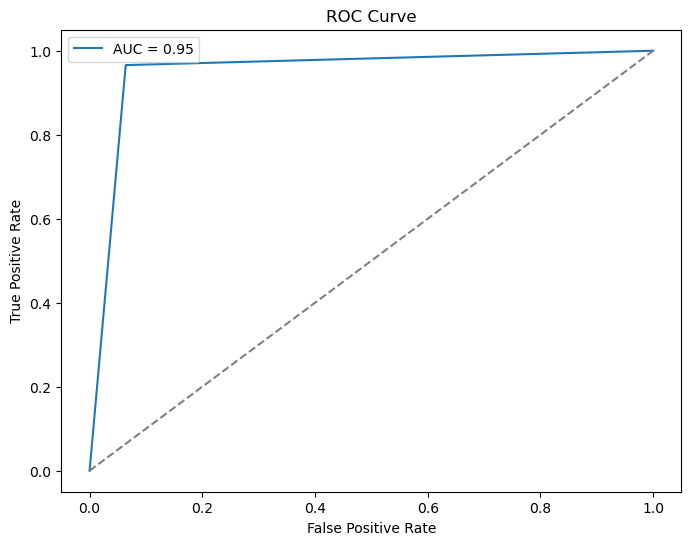

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, pred1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

here we plotted the graph for the final model, AUC value for the best model is 0.95

now i saving the model using the joblib >>>>>>>>>>>

In [38]:
import joblib
joblib.dump(final, "wine quality analysis.pkl")

['wine quality analysis.pkl']

In [39]:
model  = joblib.load("wine quality analysis.pkl")
prd = model.predict(x_test)
prd

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [40]:
ac= accuracy_score(y_test, prd)
ac*100

95.06024096385542